# Normal Ratio Method
The normal ratio (NR) method was firstly suggested by Paulhus and Kohler in 1952 and then it was updated by Young in 1992. It is based on mean ratio of data between a target station and neighbouring stations. There is another version of normal ratio method that is called old normal ratio (ONR).
The Normal Ratio Method (NR) for estimating missing values is given by:

$$
P_t = \frac{1}{T} \sum_{i=1}^{T} \left( \frac{M_s}{M_i} \right) Y_i
$$

where:

- \(P_t\) is the estimated value for the target station.
- \(T\) is the number of neighboring stations.
- \(M_s\) is the sample mean of the available data at the target station.
- \(M_i\) is the sample mean of the available data at the \(i\)-th neighboring station.
- \(Y_i\) is the observed value of the parameter (e.g., temperature or rainfall) at the \(i\)-th neighboring station.




In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Importing the dataset
df = pd.read_excel("../Drought_Prediction/data.xlsx")

In [9]:
station = ['Dangila', 'Bedele', 'Gatira']
d=[]
def get_neighbor_data(df, station, year, month, element='PRECIP'):
    for n in station:
        # df = pd.read_excel("../Drought_Prediction/data.xlsx")
        # Selecting the data of station for the year 2021 for january
        df = df[(df['NAME'] == n) & (df['YEAR'] == year) & (df["Element"] == element)]
        # print(f"Data for {n} in {month} {year}:\n", df)
        d.append(int(df[month].values))
    print(d)
        
get_neighbor_data(df, station, 2021, 'Jan',)
for i in range(len(station)):
    print(d[i])

/tmp/ipykernel_16875/3000070543.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  d.append(int(df[month].values))
/tmp/ipykernel_16875/3000070543.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  d.append(int(df[month].values))


[4, 16, 12]
4
16
12


/tmp/ipykernel_16875/3000070543.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  d.append(int(df[month].values))


In [25]:
#calculate mean for name = Abomsa for all year and element = PRECIP for january add it to array
m=[]
df_Abomsa = df[(df['NAME'] == 'Abomsa') & (df["Element"] == 'PRECIP')]
df_Abomsa = df['Jan'].mean()
# print(df_Abomsa)


def get_mean(df, station, month, element='PRECIP'):
    for n in station:
        # df = pd.read_excel("../Drought_Prediction/data.xlsx")
        # Selecting the data of station for the year 2021 for january
        df = df[(df['NAME'] == n) & (df["Element"] == element)]
        # print(f"Data for {n} in {month} {year}:\n", df)
        m.append(df[month].mean())
get_mean(df, station, 'Jan')
sum = 0
for i in range(0, len(station)-1):
    sum = sum + (df_Abomsa/m[i])*d[i]
mising_vlaue = sum/len(station)
print(f"Missing value for Abomsa station for january  2021 using Normal Ratio Method is : {mising_vlaue}")

Missing value for Abomsa station for january  2021 using Normal Ratio Method is : 17.480519589633282


0     NaN
2     7.4
3     2.0
4     5.4
5    67.7
6    19.9
7     0.0
8     0.0
Name: Jan, dtype: float64
Mean value for Abomsa station is: 14.628571428571428


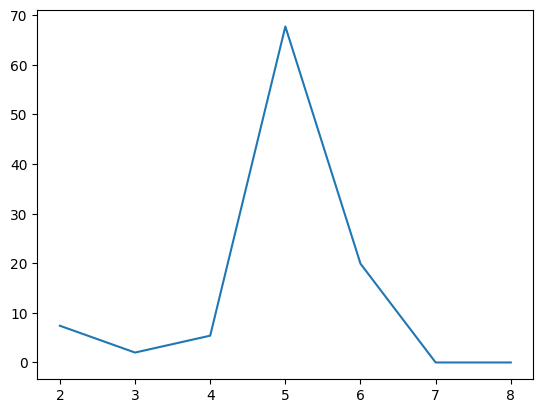

In [26]:
#value for Abomsa for january for all year
df_Abomsa_Jan = df[(df['NAME'] == 'Abomsa') & (df["Element"] == 'PRECIP')]
df_Abomsa_Jan = df_Abomsa_Jan['Jan'].head(8)
print(df_Abomsa_Jan)
#visualize january for Abomsa for all year
df_Abomsa_Jan.plot()

#Mean value for Abomsa station for january
print(f"Mean value for Abomsa station is: {df_Abomsa_Jan.mean()}")

# Geographical Coordinates Method
Geographical coordinate (GC) method is a weighting method which is used for imputing missing rainfall values. It uses the inverse of geographical coordinates (latitude and longitude) to calculate weight coefficient. In GC method, the centre point represents a target station. The distance from a centre point to surrounding stations is computed in order to determine the nearest stations.
The formula is given by:

The formula is given by:

$$
P_t = {\sum_{i=1}^{n}\frac{ \left( \frac{1}{X_i^2 + Y_i^2} \right) }{\sum_{i=1}^{n} \left( \frac{1}{X_i^2 + Y_i^2} \right) }Y_i}
$$

where:

- \(P_t\) is the estimated value.
- \(X_i\) and \(Y_i\) are coordinates for the \(i\)-th point.
- \(Y_i\) is the observed value for the \(i\)-th point.
- \(n\) is the number of points.

